### [Reference](https://github.com/tanveer-hussain/DFAN)

In [ ]:
# 安裝Tensorflow（2.9.0）和一些基礎函式庫，包括PIL、cv2、numpy等。
!pip install tensorflow==2.9.0
!pip install pillow
!pip install opencv-python-headless
!pip install numpy

In [ ]:
import tensorflow as tf
from PIL import Image
import cv2
import numpy as np


### 1. 讀取雲端硬碟中的資料

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


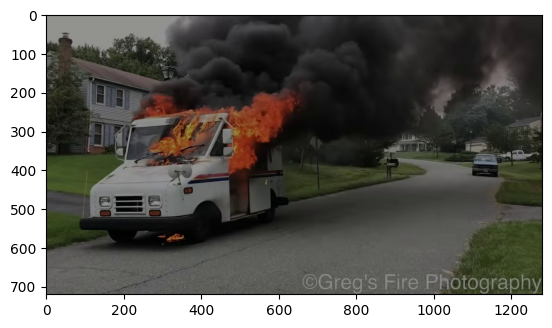

In [ ]:
# 測試圖片順利讀取
import matplotlib.pyplot as plt
from PIL import Image

image_file = '/content/drive/MyDrive/Oringal DFAN/Van_Fire/Van (1).jpg'
image = Image.open(image_file)

plt.imshow(image)
# plt.axis('off') # 隱藏座標軸
plt.show()


Boat_Fire: 338
Building_Fire: 305
Bus_Fire: 400
Car_Fire: 579
Cargo_Fire: 207
Electric_Fire: 300
Forest_Fire: 480
Non_Fire: 97
PickUp_Fire: 257
SUV_Fire: 240
Train_Fire: 300
Van_Fire: 300
# total_images: 3803


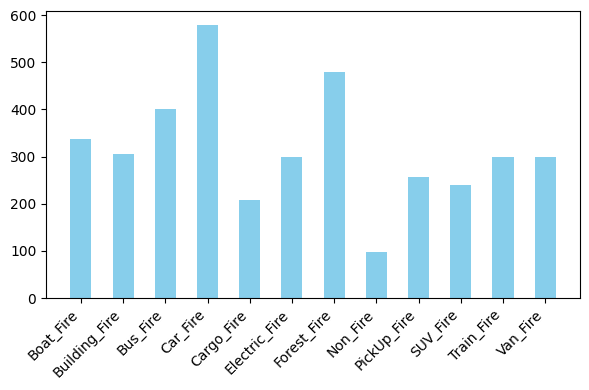

In [ ]:
# 圖片數量
folder_paths = [
    'Boat_Fire',
    'Building_Fire',
    'Bus_Fire',
    'Car_Fire',
    'Cargo_Fire',
    'Electric_Fire',
    'Forest_Fire',
    'Non_Fire',
    'PickUp_Fire',
    'SUV_Fire',
    'Train_Fire',
    'Van_Fire'
]

image_counts = []
total_images = 0
for folder_name in folder_paths:
    folder_path = os.path.join('/content/drive/MyDrive/Oringal DFAN/', folder_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    print(f"{folder_name}: {len(image_files)}")
    image_count = len(image_files)
    image_counts.append(image_count)
    total_images += image_count
print(f"# total_images: {total_images}")

plt.figure(figsize=(6, 4))
plt.bar(folder_paths, image_counts, color='skyblue', width=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 2.

使用InceptionV3對影像進行分類，包含預處理和資料準備。

載入InceptionV3，並設定輸入影像的大小299x299像素。

遍歷資料夾中的圖像數據，載入圖像並調整大小為模型所需的尺寸。

印出各資料集的大小和資料夾的數量。

準備圖像資料並建立一個用於分類的深度學習模型。

In [ ]:
import numpy as np
import seaborn as sns
import cv2, os, glob, datetime
import matplotlib.pyplot as plt
from keras import layers, Input
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.applications import InceptionV3
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout, GlobalAveragePooling2D
# inp 是一個變量，用於指定輸入影像的大小
inp = 299
model = InceptionV3(weights="imagenet", include_top=False, input_shape=(inp, inp, 3))
folder_paths = [
    'Boat_Fire',
    'Building_Fire',
    'Bus_Fire',
    'Car_Fire',
    'Cargo_Fire',
    'Electric_Fire',
    'Forest_Fire',
    'Non_Fire',
    'PickUp_Fire',
    'SUV_Fire',
    'Train_Fire',
    'Van_Fire'
]

img_list = []
label_list = []

for folder_name in folder_paths:
    folder_path = os.path.join('/content/drive/MyDrive/Oringal DFAN/', folder_name)
    print(folder_path)
    for img in glob.glob(os.path.join(folder_path, "*.jpg")):
        n = cv2.imread(img)
        class_num = folder_paths.index(folder_name)
        label_list.append(class_num)
        resized = cv2.resize(n, (299, 299), interpolation=cv2.INTER_AREA)
        img_list.append(resized)

X_train, X_valid, y_train, y_valid = train_test_split(img_list, label_list, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)
print("training_set", X_train.shape)
print("training_set", y_train.shape)
print("validation_set", X_valid.shape)
print("validation_set", y_valid.shape)
print("test_set", X_test.shape)
print("test_set", y_test.shape)
print("Train_Folder", len(X_train))
print("validation_Folder", len(X_valid))
print("Test_Folder", len(X_test))


87910968/87910968 [==============================] - 0s 0us/step
/content/drive/MyDrive/Oringal DFAN/Boat_Fire
/content/drive/MyDrive/Oringal DFAN/Building_Fire
/content/drive/MyDrive/Oringal DFAN/Bus_Fire
/content/drive/MyDrive/Oringal DFAN/Car_Fire
/content/drive/MyDrive/Oringal DFAN/Cargo_Fire
/content/drive/MyDrive/Oringal DFAN/Electric_Fire
/content/drive/MyDrive/Oringal DFAN/Forest_Fire
/content/drive/MyDrive/Oringal DFAN/Non_Fire
/content/drive/MyDrive/Oringal DFAN/PickUp_Fire
/content/drive/MyDrive/Oringal DFAN/SUV_Fire
/content/drive/MyDrive/Oringal DFAN/Train_Fire
/content/drive/MyDrive/Oringal DFAN/Van_Fire
training_set (2737, 299, 299, 3)
training_set (2737,)
validation_set (761, 299, 299, 3)
validation_set (761,)
test_set (305, 299, 299, 3)
test_set (305,)
Train_Folder 2737
validation_Folder 761
Test_Folder 305


建立一個包含了自訂層的深度學習模型。

包括全局平均池化、全連接層、卷積層、批量歸一化等層，這些層的組合可以幫助提取影像特徵並進行分類。

In [ ]:
inputs =Input((inp, inp, 3))
X = model(inputs)
flat1 = GlobalAveragePooling2D()(X)
x3=layers.GlobalAveragePooling2D()(X)
x1=layers.Dense(100, activation='relu')(flat1)
x1=layers.Dense(50, activation='relu')(x1)
x1=layers.BatchNormalization()(x1)

x2=layers.Conv2D(filters = 64,kernel_size = (1,1), activation='relu', padding='same')(X)
x2=layers.Conv2D(filters = 64,kernel_size = (3,3), activation='relu', padding='same')(x2)
x2=layers.Conv2D(filters = 64,kernel_size = (1,1), activation='relu', padding='same')(x2)

x2=layers.GlobalAveragePooling2D()(x2)
x2=layers.BatchNormalization()(x2)

BAM=layers.concatenate([x1, x2])
BAM=layers.BatchNormalization()(BAM)
BAM=layers.concatenate([x3, BAM])

F=layers.Dense(150, activation='relu')(BAM)
F=layers.BatchNormalization()(F)
output = Dense(12,activation='softmax')(F)
model = Model(inputs=inputs, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 inception_v3 (Functional)   (None, 8, 8, 2048)           2180278   ['input_2[0][0]']             
                                                          4                                       
                                                                                                  
 conv2d_94 (Conv2D)          (None, 8, 8, 64)             131136    ['inception_v3[0][0]']        
                                                                                                  
 global_average_pooling2d (  (None, 2048)                 0         ['inception_v3[0][0]']    

編譯模型並訓練。

透過編譯模型、指定優化器和損失函數、以及訓練模型，完成深度學習模型的訓練過程。

將訓練好的模型儲存到文件中。

In [ ]:
batch_size = 24
epochs = 50
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_valid,y_valid))
model.save("DFAN.h5")

Epoch 1/50
115/115 [==============================] - 90s 477ms/step - loss: 2.3126 - accuracy: 0.2616 - val_loss: 209.9676 - val_accuracy: 0.0999
Epoch 2/50
115/115 [==============================] - 43s 375ms/step - loss: 1.8878 - accuracy: 0.3862 - val_loss: 18.3194 - val_accuracy: 0.1787
Epoch 3/50
115/115 [==============================] - 43s 373ms/step - loss: 1.5360 - accuracy: 0.5020 - val_loss: 3.6698 - val_accuracy: 0.2234
Epoch 4/50
115/115 [==============================] - 43s 375ms/step - loss: 1.2103 - accuracy: 0.6142 - val_loss: 2.5234 - val_accuracy: 0.3325
Epoch 5/50
115/115 [==============================] - 41s 356ms/step - loss: 1.0333 - accuracy: 0.6624 - val_loss: 2.6003 - val_accuracy: 0.3903
Epoch 6/50
115/115 [==============================] - 41s 356ms/step - loss: 0.7319 - accuracy: 0.7716 - val_loss: 2.0308 - val_accuracy: 0.4875
Epoch 7/50
115/115 [==============================] - 41s 355ms/step - loss: 0.5203 - accuracy: 0.8305 - val_loss: 1.9805 - val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


繪製訓練和驗證準確率以及損失隨著訓練輪數的變化情況。

<Figure size 3000x3000 with 0 Axes>

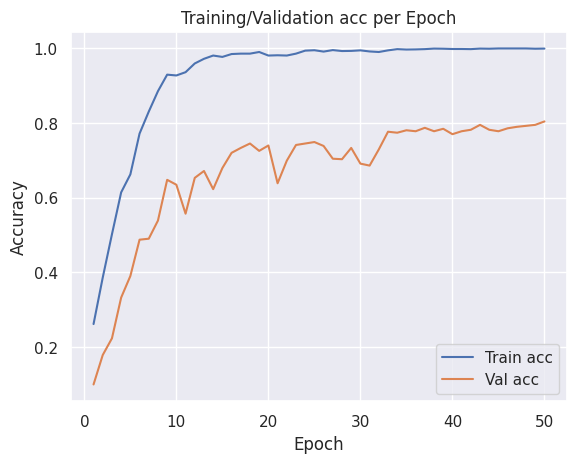

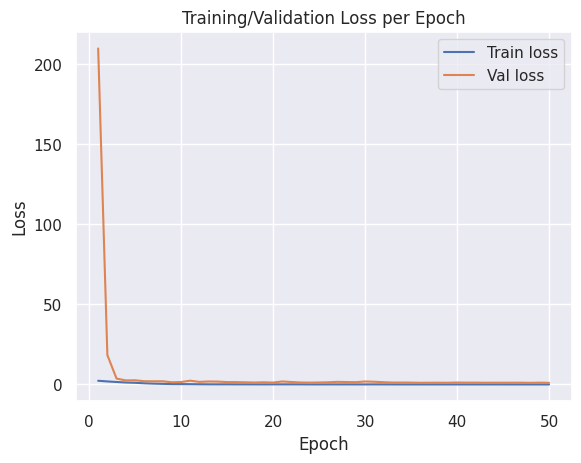

10/10 [==============================] - 7s 102ms/step
***** Confusion Matrix *****
[[19  1  0  0  0  0  0  0  0  1  0  0]
 [ 0 19  4  0  2  0  0  0  0  0  1  0]
 [ 1  1 22  0  0  1  0  0  0  0  0  0]
 [ 1  0  0 38  0  0  0  0  3  1  1  1]
 [ 1  2  2  1 12  0  1  1  1  0  0  2]
 [ 1  3  1  0  1 17  0  1  0  0  0  0]
 [ 0  1  0  0  0  1 39  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  7  0  0  0  1]
 [ 0  0  0  3  0  0  0  0 19  0  0  0]
 [ 0  0  0  2  0  0  0  0  0 17  0  0]
 [ 1  1  1  0  2  0  0  1  0  0 18  0]
 [ 0  0  3  2  0  0  0  0  0  0  0 21]]
***** Classification Report *****
               precision    recall  f1-score   support

    Boat_Fire       0.79      0.90      0.84        21
Building_Fire       0.66      0.73      0.69        26
     Bus_Fire       0.67      0.88      0.76        25
     Car_Fire       0.83      0.84      0.84        45
   Cargo_Fire       0.71      0.52      0.60        23
Electric-Fire       0.89      0.71      0.79        24
  Forest_Fire       0.97   

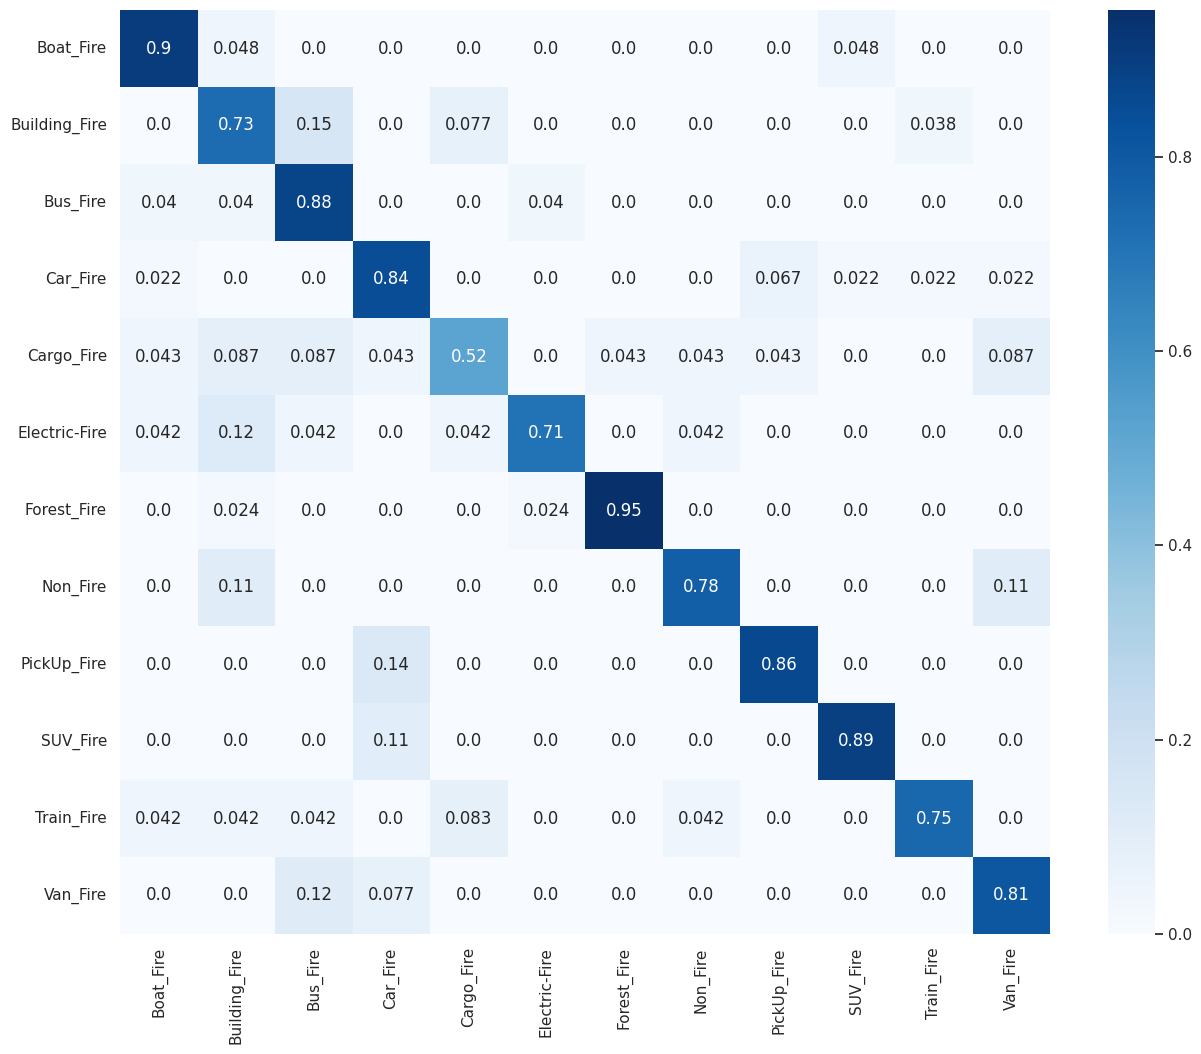

10/10 [==============================] - 1s 118ms/step - loss: 1.0068 - accuracy: 0.8131

Testing loss: 1.0068
Testing accuracy: 0.8131


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix
import matplotlib.pyplot as plot
import seaborn as sn
import pandas as pd
import seaborn as sns
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
plt.figure(figsize=(30,30))
sns.set(font_scale=1.0)

f, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'])
ax.plot([None] + history.history['val_accuracy'])
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Val acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'])
ax.plot([None] + history.history['val_loss'])
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 1)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()


y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)

target_names = ["Boat_Fire","Building_Fire","Bus_Fire","Car_Fire","Cargo_Fire","Electric-Fire","Forest_Fire","Non_Fire","PickUp_Fire","SUV_Fire","Train_Fire","Van_Fire"]
cm = confusion_matrix(y_test, y_pred)
print("***** Confusion Matrix *****")
print(cm)
print("***** Classification Report *****")
print(classification_report(y_test, y_pred, target_names=target_names))
classes=12
con = np.zeros((classes,classes))
for x in range(classes):
    for y in range(classes):
        con[x,y] = cm[x,y]/np.sum(cm[x,:])

plt.figure(figsize=(15,12))
df = sns.heatmap(con, annot=True,fmt='.2', cmap='Blues',xticklabels= target_names , yticklabels= target_names)
df.figure.savefig("DFAN.png")
plt.show()

print('\nTesting loss: {:.4f}\nTesting accuracy: {:.4f}'.format(*model.evaluate(X_test, y_test)))